In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from _config import PKL_PROCESSED_STEP2_DTU_SOLAR_STATION

In [3]:
df = pd.read_pickle(PKL_PROCESSED_STEP2_DTU_SOLAR_STATION)
df = df[sorted(df.columns)]
df_raw = df.copy()
print(df.shape)
print(df.info())

df.head()

(5159945, 10)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5159945 entries, 2015-03-12 01:00:00 to 2025-01-01 08:04:00
Freq: min
Data columns (total 10 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   DHI                       float64
 1   DNI                       float64
 2   air_pressure_lag_60       float64
 3   air_temperature_lag_60    float64
 4   rain_duration_lag_60      float64
 5   rain_intensity_lag_60     float64
 6   relative_humidity_lag_60  float64
 7   solar_altitude_lag_60     float64
 8   wind_dir_avg_lag_60       float64
 9   wind_speed_avg_lag_60     float64
dtypes: float64(10)
memory usage: 433.0 MB
None


,DHI,DNI,air_pressure_lag_60,air_temperature_lag_60,rain_duration_lag_60,rain_intensity_lag_60,relative_humidity_lag_60,solar_altitude_lag_60,wind_dir_avg_lag_60,wind_speed_avg_lag_60
2015-03-12 01:00:00,0.0,0.0,1027.0,3.3,0.0,0.0,81.1,-37.112922,52.0,0.9
2015-03-12 01:01:00,0.0,0.0,1027.0,3.3,0.0,0.0,80.8,-37.081595,83.0,0.7
2015-03-12 01:02:00,0.0,0.0,1027.0,3.3,0.0,0.0,80.8,-37.049526,53.0,0.7
2015-03-12 01:03:00,0.0,0.0,1027.0,3.3,0.0,0.0,80.9,-37.016716,51.0,0.8
2015-03-12 01:04:00,0.0,0.0,1027.0,3.3,0.0,0.0,80.7,-36.983166,44.0,0.7


In [4]:
df = df_raw.copy()
df.dropna(inplace=True)
# Separate features and targets.
TARGETS = ['DNI', 'DHI']
X = df.drop(columns=TARGETS)
y = df[TARGETS]
X_train = X.loc[:'2022']
y_train = y.loc[:'2022']
X_test = X.loc['2022':]
y_test = y.loc['2022':]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Create the linear regression model.
model = LinearRegression()

# Fit the model on the training data.
model.fit(X_train, y_train)

# Make predictions on the test data.
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error for each target.
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error for each target:", mse)


(3759949, 8) (3759949, 2) (1553223, 8) (1553223, 2)
Mean Squared Error for each target: [45007.13071523  4069.12304047]


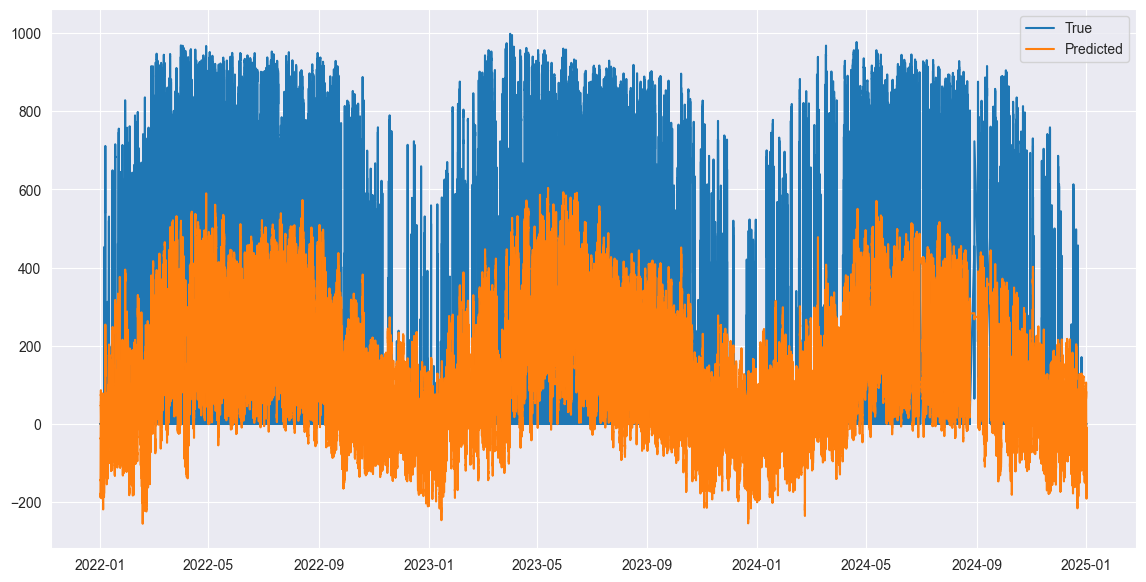

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 1000  # or another value > 100
# Visualize the predictions for the first target (DNI).
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test['DNI'], label='True')
plt.plot(y_test.index, y_pred[:, 0], label='Predicted')
plt.legend()
plt.show()